Nama = Thariq Muhammad Shaleh

Email =  Thariq73@gmail.com

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.3.0


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-09-03 00:11:25--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  35.1MB/s    in 9.7s    

2020-09-03 00:11:35 (31.8 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()



In [5]:
pip install split_folders

In [72]:
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images/', output='hasil_split', seed=1337, ratio=(.6, .4))
hasil = 'hasil_split'
rain_dir = os.path.join(hasil, 'train')
validation_dir = os.path.join(hasil, 'val')

train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

val_rock_dir = os.path.join(validation_dir, 'rock')
val_paper_dir = os.path.join(validation_dir, 'paper')
val_scissors_dir = os.path.join(validation_dir, 'scissors')

Copying files: 2188 files [00:00, 3328.81 files/s]


In [106]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zca_epsilon=1e-02,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zca_epsilon=1e-02,
                    fill_mode = 'nearest')

In [107]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), 
        batch_size=32, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [108]:
from keras.layers import Dropout

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2,),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [109]:
from keras.optimizers import SGD
opt = SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'],)

In [110]:
from keras.callbacks import LearningRateScheduler

def my_learning_rate(epoch, lrate):
	return lrate
lrs = LearningRateScheduler(my_learning_rate)

#from keras.callbacks import ReduceLROnPlateau
#rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=44)

model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[lrs])

Epoch 1/20
25/25 - 41s - loss: 1.1013 - accuracy: 0.3325 - val_loss: 1.0879 - val_accuracy: 0.4313
Epoch 2/20
25/25 - 40s - loss: 1.0851 - accuracy: 0.3925 - val_loss: 1.0687 - val_accuracy: 0.4437
Epoch 3/20
25/25 - 40s - loss: 1.0835 - accuracy: 0.4075 - val_loss: 1.1025 - val_accuracy: 0.3562
Epoch 4/20
25/25 - 40s - loss: 1.0875 - accuracy: 0.3800 - val_loss: 1.0474 - val_accuracy: 0.5375
Epoch 5/20
25/25 - 40s - loss: 1.0532 - accuracy: 0.4437 - val_loss: 1.0331 - val_accuracy: 0.5063
Epoch 6/20
25/25 - 40s - loss: 1.0327 - accuracy: 0.4812 - val_loss: 1.0897 - val_accuracy: 0.4563
Epoch 7/20
25/25 - 44s - loss: 0.9999 - accuracy: 0.5238 - val_loss: 0.9338 - val_accuracy: 0.5188
Epoch 8/20
25/25 - 40s - loss: 0.9980 - accuracy: 0.5025 - val_loss: 1.3015 - val_accuracy: 0.3438
Epoch 9/20
25/25 - 40s - loss: 0.9505 - accuracy: 0.5962 - val_loss: 0.7410 - val_accuracy: 0.7000
Epoch 10/20
25/25 - 40s - loss: 0.9185 - accuracy: 0.5775 - val_loss: 0.8456 - val_accuracy: 0.6625
Epoch 11/

Saving IMG_20200901_135600.jpg to IMG_20200901_135600 (8).jpg
IMG_20200901_135600.jpg
rock


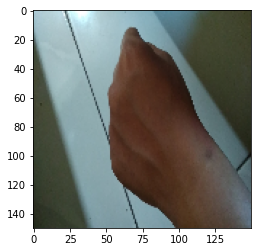

In [114]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print("unknown")